<a href="https://colab.research.google.com/github/ROYALKINGISK/ML-LAB/blob/main/ML_BL_EN_U4CSE21070_LAB4_MODIFIED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
df=pd.read_excel("LAB4.xlsx")
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [22]:
#A1
from math import log2
def entropy(df):
    total_count = len(df)
    if total_count == 0:
        return 0
    counts = df.value_counts()
    entropy = -sum((count / total_count) * log2(count / total_count) for count in counts)
    return entropy

entropy_buys_computer = entropy(df['buys_computer'])
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for feature in features:
    weighted_entropy = 0
    unique_values = df[feature].unique()
    for value in unique_values:
        subset = df[df[feature] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weighted_entropy += (len(subset) / len(df)) * subset_entropy
    information_gains[feature] = entropy_buys_computer - weighted_entropy
root_node = max(information_gains, key=information_gains.get)
print(f"The first feature for constructing the decision tree (root node) is: {root_node}")


The first feature for constructing the decision tree (root node) is: age


In [23]:
#A2
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']
categorical_features = ['age', 'income', 'student', 'credit_rating']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
pipeline.fit(X, y)
tree_depth = pipeline.named_steps['classifier'].get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

Depth of the Decision Tree: 4


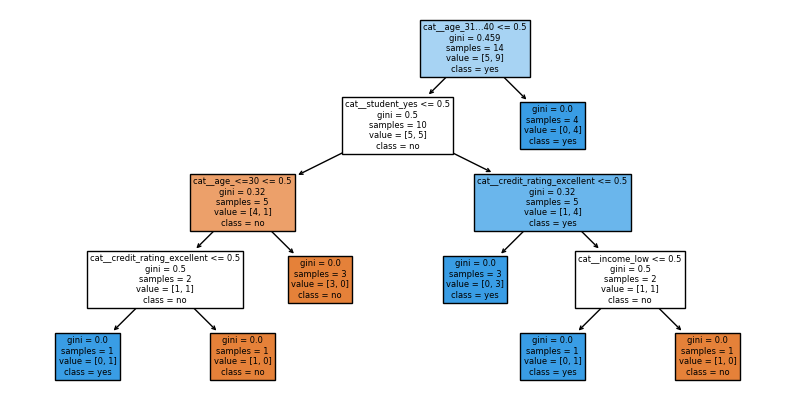

In [24]:
#A3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a pipeline with preprocessor and DecisionTreeClassifier (as previously shown)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # The preprocessor includes one-hot encoding
    ('classifier', DecisionTreeClassifier())
])

# Fit the model
pipeline.fit(X, y)

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot the Decision Tree
plot_tree(pipeline.named_steps['classifier'], filled=True, feature_names=preprocessor.get_feature_names_out(input_features=categorical_features), class_names=pipeline.named_steps['classifier'].classes_)

# Show the plot
plt.show()



In [ ]:
#A4
data=pd.read_csv("extracted_features_charrec.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,class_name
0,1.000000e+00,1.524962e-09,1.291224e-34,0.000000e+00,3.222997e-21,1.421599e-26,1.708062e-36,7.169317e-30,2.448611e-27,1.208083e-35,...,9.659650e-12,7.440510e-29,3.081735e-21,2.480268e-31,2.282260e-20,2.551014e-34,0.000000e+00,0.000000e+00,1.400842e-32,3333
1,1.000000e+00,1.410068e-14,4.294197e-36,0.000000e+00,3.322369e-26,4.285897e-30,0.000000e+00,3.273511e-31,4.346752e-30,0.000000e+00,...,3.049710e-17,3.113534e-28,2.010829e-23,5.288738e-32,7.928905e-22,9.177779e-38,0.000000e+00,0.000000e+00,5.740396e-37,3333
2,9.360005e-01,6.343618e-02,3.091646e-12,1.446004e-17,1.146526e-25,6.099108e-17,1.938759e-23,3.343781e-07,2.188847e-15,2.025843e-30,...,2.234709e-16,5.619065e-16,1.712380e-22,3.992831e-26,3.446797e-16,3.685500e-28,6.196493e-35,5.039152e-36,6.320697e-31,3333
3,1.000000e+00,2.704598e-11,2.784285e-29,2.442646e-37,3.035282e-18,1.730503e-23,3.354926e-31,7.994918e-26,8.538911e-24,9.513178e-30,...,2.455201e-11,1.114922e-22,4.283180e-17,5.784818e-24,5.076128e-17,1.737384e-28,5.763894e-38,3.886031e-36,7.138627e-27,3333
4,2.417935e-02,1.469704e-03,1.495102e-15,2.386544e-29,1.068092e-26,4.746503e-20,4.631930e-23,8.611759e-16,1.162853e-18,3.202135e-30,...,6.959718e-12,2.639628e-22,1.407187e-26,3.363623e-25,1.520253e-22,4.776569e-33,0.000000e+00,0.000000e+00,1.205014e-32,3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,2.451725e-33,1.774474e-33,4.215571e-31,4.593274e-38,4.775950e-19,2.068774e-21,2.906052e-30,6.547040e-30,1.402584e-26,5.167762e-17,...,5.222812e-19,5.816371e-24,3.724812e-25,1.474364e-13,2.114840e-19,4.437357e-15,2.403206e-09,8.874058e-15,1.000000e+00,3454
6653,1.425826e-10,1.397487e-15,1.787416e-20,4.547916e-29,7.515032e-05,1.092327e-13,1.785424e-15,7.526079e-12,1.703476e-14,6.629468e-11,...,8.923496e-05,2.746620e-08,3.789676e-11,1.147802e-04,5.395482e-10,1.118326e-08,5.909428e-12,1.706227e-10,7.182543e-01,3454
6654,1.046195e-15,1.976708e-28,2.992494e-33,5.791391e-36,4.919657e-10,1.855449e-16,0.000000e+00,3.177622e-22,2.363232e-19,9.133325e-24,...,4.501868e-20,3.232492e-15,5.937526e-05,5.561043e-18,3.483595e-01,8.142888e-03,1.672542e-14,6.398116e-01,3.626655e-03,3454
6655,1.333823e-09,9.141971e-18,5.180071e-24,3.784704e-33,9.205425e-09,7.909794e-12,5.525115e-21,6.901417e-15,1.070209e-15,8.045300e-17,...,1.442237e-09,7.523521e-15,4.109667e-11,9.645658e-16,5.355393e-05,5.231006e-03,6.112241e-11,3.338247e-09,9.946076e-01,3454


Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6381381381381381


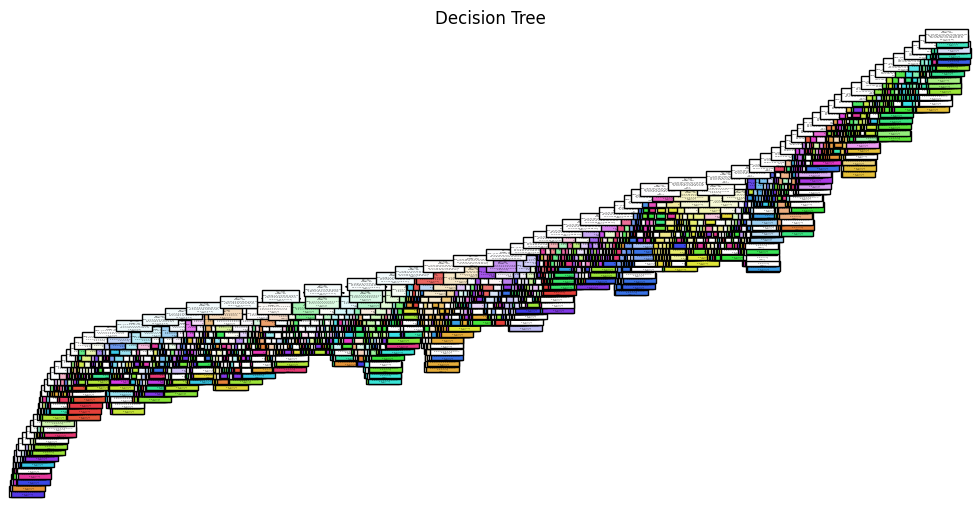

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X = data.drop(columns=['class_name'])
y = data['class_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=str(y.unique()))
plt.title("Decision Tree")
plt.show()

Training Set Accuracy (max_depth=5): 0.20413145539906102
Test Set Accuracy (max_depth=5): 0.2072072072072072


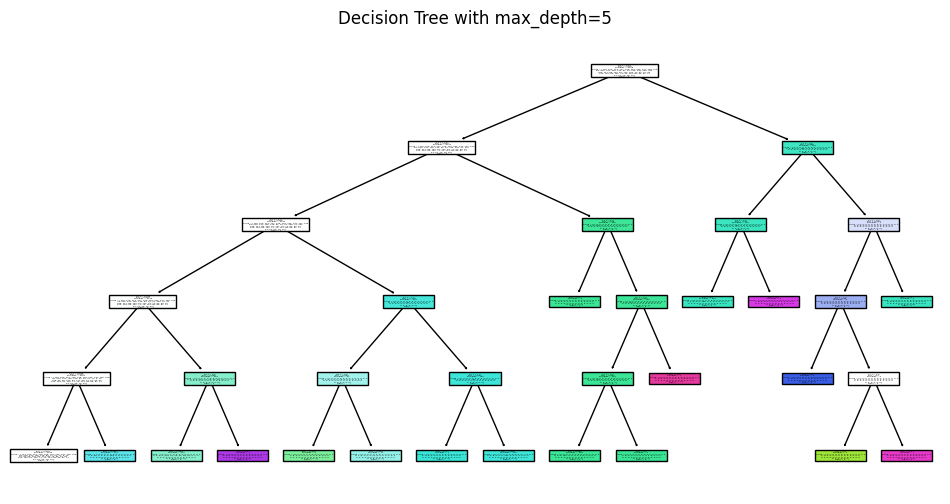

In [ ]:
#A5
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
training_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Set Accuracy (max_depth=5): {training_accuracy}")
print(f"Test Set Accuracy (max_depth=5): {test_accuracy}")
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=str(y.unique()))
plt.title("Decision Tree with max_depth=5")
plt.show()

Test Set Accuracy (Criterion='gini'): 0.6336336336336337
Test Set Accuracy (Criterion='entropy'): 0.6253753753753754


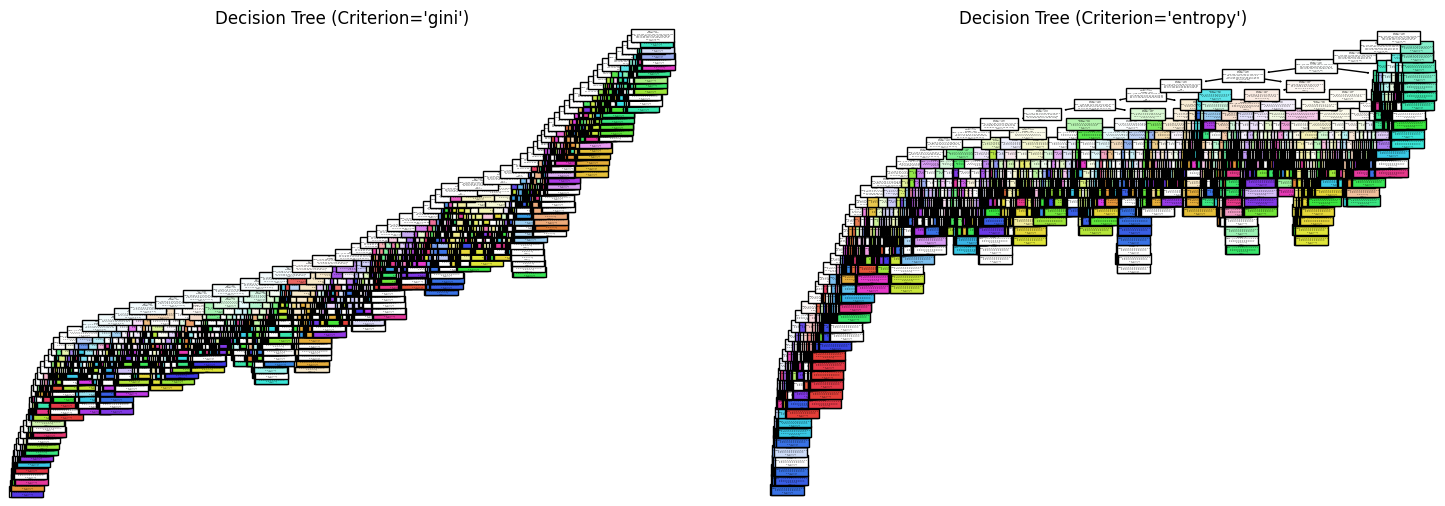

In [ ]:
#A6
model_gini = DecisionTreeClassifier()
model_gini.fit(X_train, y_train)
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)
test_accuracy_gini = model_gini.score(X_test, y_test)
test_accuracy_entropy = model_entropy.score(X_test, y_test)

print(f"Test Set Accuracy (Criterion='gini'): {test_accuracy_gini}")
print(f"Test Set Accuracy (Criterion='entropy'): {test_accuracy_entropy}")
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=str(y.unique()))
plt.title("Decision Tree (Criterion='gini')")
plt.subplot(1, 2, 2)
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=str(y.unique()))
plt.title("Decision Tree (Criterion='entropy')")

plt.show()

In [ ]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv("extracted_features_charrec.csv")
X = data.drop(columns=["class_name"])
y = data["class_name"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Decision Tree Classifier Performance:
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

        3333       0.63      0.75      0.68        36
        3334       0.64      0.82      0.72        33
        3335       0.37      0.67      0.47        39
        3337       0.65      0.59      0.62        34
        3342       0.32      0.36      0.34        28
        3343       0.19      0.15      0.17        26
        3346       0.52      0.57      0.55        21
        3349       0.82      0.66      0.73        47
        3350       0.20      0.10      0.13        20
        3351       0.92      0.84      0.88        43
        3352       0.15      0.14      0.14        22
        3353       0.81      0.76      0.79        29
        3354       0.92      0.77      0.84        30
        3355       0.21      0.20      0.21        20
        3356       0.75      0.75      0.75        32
        3357       0.65      0.48      0.55        27
     